In [1]:
import pandas as pd 
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 200)
import numpy as np 
from scipy.stats import skew
import scipy.stats as stats 

import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [4]:
df = pd.concat(objs=[train, test], axis=0, sort=False, ignore_index=True)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


## 将nan值统一填充为 np.nan

In [6]:
df = df.fillna(np.nan)

## MSZoning 根据Neighborhood 填充缺失值

In [7]:
index = df.MSZoning[df.MSZoning.isnull()==True].index

df.loc[index[:3], 'MSZoning'] = 'IDOTRR'
df.loc[index[3:], 'MSZoning'] = 'Mitchel'

## 将 YearBuilt, YearRemodAdd, GarageYrAdd, YrSold, MssubClass 类型转为 object

In [8]:
df['YearBuilt'] = df['YearBuilt'].apply(str)
df['YearRemodAdd'] = df['YearRemodAdd'].apply(str)
df['GarageYrBlt'] = df['GarageYrBlt'].apply(str)
df['YrSold'] = df['YrSold'].apply(str)
df['MSSubClass'] = df['MSSubClass'].apply(str)

In [9]:
num_cols = df.dtypes[df.dtypes != 'object'].index
obj_cols = df.dtypes[df.dtypes == 'object'].index
num_cols

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'SalePrice'],
      dtype='object')

## GrLivArea 去除 4500 以上的两个离群点

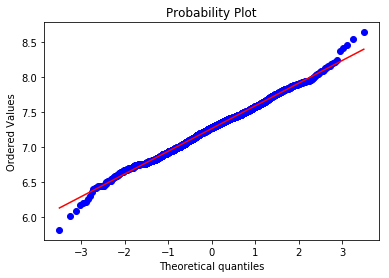

In [10]:
df['GrLivArea'].skew()

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
stats.probplot(df['GrLivArea'].apply(np.log1p), plot=ax)
df['GrLivArea'] = df['GrLivArea'].apply(np.log1p)

df.drop(train['GrLivArea'][train['GrLivArea']>4500].index, axis=0, inplace=True)

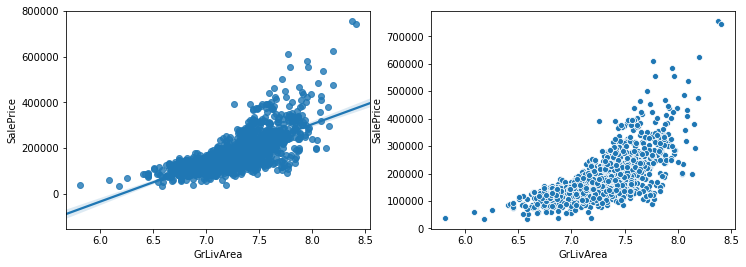

In [11]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(1,2,1)
sns.regplot(df['GrLivArea'], df['SalePrice'])
ax2 = fig.add_subplot(1,2,2)
sns.scatterplot(df['GrLivArea'], df['SalePrice'])

## 画出与 SalePrice 相关系数较高的前几个特征与 SalePrice 的散点分布图

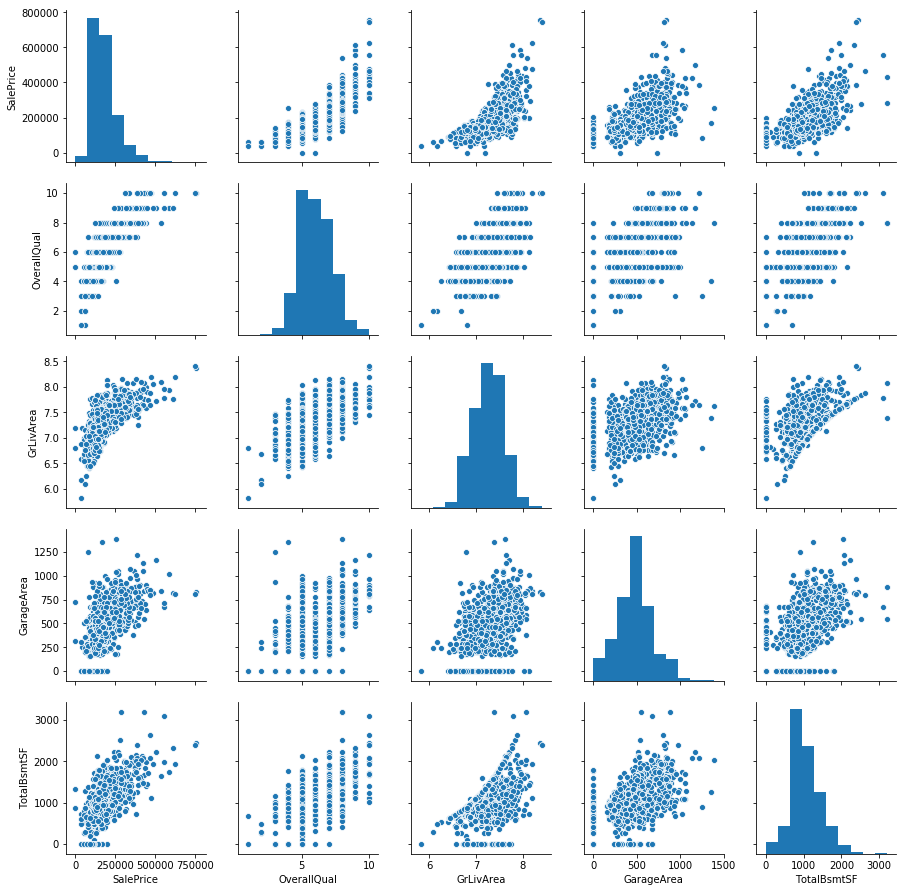

In [12]:
sns.pairplot(df[:len(train)].loc[:,['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF']].fillna(0))

## 缺失值处理

In [13]:
# 缺失值个数 <=10 
df['SaleType'].fillna('WD', inplace=True)
df['Electrical'].fillna('SBrkr', inplace=True)

df['GarageArea'].fillna(df['GarageArea'].mean(), inplace=True)
df['GarageCars'].fillna(df['GarageCars'].mean(), inplace=True)
df['Exterior1st'].fillna('VinylSd', inplace=True)
df['Exterior2nd'].fillna('VinylSd', inplace=True)
df['KitchenQual'].fillna(df['KitchenQual'].mode()[0], inplace=True)

df['TotalBsmtSF'].fillna(0, inplace=True)
df['BsmtFinSF1'].fillna(0, inplace=True)
df['BsmtUnfSF'].fillna(0, inplace=True)
df['BsmtFinSF2'].fillna(0, inplace=True)

df['Functional'].fillna(df['Functional'].mode()[0], inplace=True)
df['BsmtHalfBath'].fillna(df['BsmtHalfBath'].mode()[0], inplace=True)
df['BsmtFullBath'].fillna(df['BsmtFullBath'].mode()[0], inplace=True)
# df['NumOfBath'].fillna(df['NumOfBath'].mode()[0], inplace=True)
df['Utilities'].fillna(df['Utilities'].mode()[0], inplace=True)

In [14]:
# 缺失值个数 >= 10
features = ['MasVnrType', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'BsmtCond','BsmtExposure',\
    'GarageType', 'GarageCond', 'GarageQual','GarageFinish', 'FireplaceQu',\
    'Fence', 'Alley', 'MiscFeature', 'PoolQC']

for feature in features:
    df[feature].fillna('None', inplace=True)

In [15]:
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True)

In [16]:
df['MasVnrArea'].fillna(df['MasVnrArea'].mean(), inplace=True)

In [17]:
df.isnull().sum()[df.isnull().sum()!=0].sort_values()

SalePrice    1459
dtype: int64

In [18]:
df.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.795774
GrLivArea        0.702933
TotalBsmtSF      0.651153
GarageCars       0.641047
1stFlrSF         0.631530
GarageArea       0.629217
FullBath         0.562165
TotRmsAbvGrd     0.537769
MasVnrArea       0.480421
Fireplaces       0.469862
BsmtFinSF1       0.409384
LotFrontage      0.352716
WoodDeckSF       0.324758
OpenPorchSF      0.321142
2ndFlrSF         0.320532
HalfBath         0.284590
LotArea          0.268179
BsmtFullBath     0.228459
BsmtUnfSF        0.214460
BedroomAbvGr     0.168245
ScreenPorch      0.111415
PoolArea         0.099490
MoSold           0.046124
3SsnPorch        0.044568
BsmtFinSF2      -0.011422
BsmtHalfBath    -0.016881
MiscVal         -0.021203
Id              -0.021673
LowQualFinSF    -0.025625
OverallCond     -0.077948
EnclosedPorch   -0.128646
KitchenAbvGr    -0.135946
Name: SalePrice, dtype: float64

## OverallQual

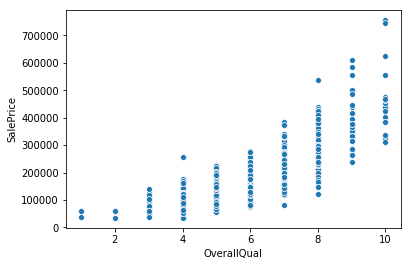

In [19]:
# sns.scatterplot(df['LotFrontage'].fillna(0), df['SalePrice'])
fig = plt.figure()
ax1 = fig.add_subplot()
sns.scatterplot(df['OverallQual'], df['SalePrice'])

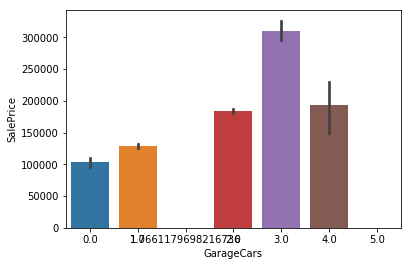

In [20]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
sns.barplot(df['GarageCars'], df['SalePrice'])

0.21890159885169574

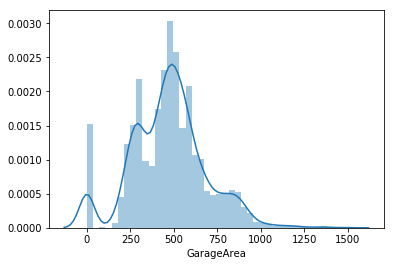

In [21]:
sns.distplot(df['GarageArea'].fillna(0))
df['GarageArea'].fillna(df['GarageArea'].mean()).skew()
# df[df['GarageArea'].isnull()]

((array([-3.4943654 , -3.25015084, -3.11507391, ...,  3.11507391,
          3.25015084,  3.4943654 ]),
  array([   0.,    0.,    0., ..., 3200., 3206., 5095.])),
 (421.46822237763234, 1048.967775111416, 0.9804724671118593))

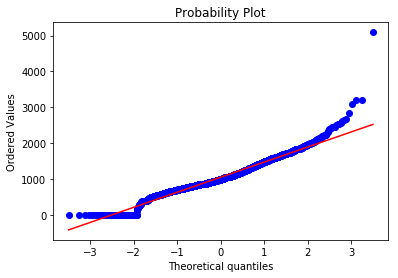

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(df['TotalBsmtSF'], plot=ax)
# sns.distplot(df['TotalBsmtSF'])

## 1stFlrSF

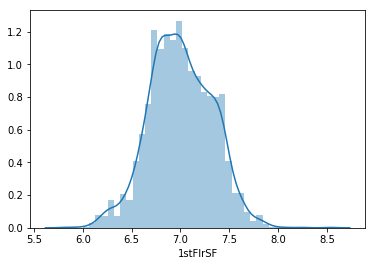

In [23]:
sns.distplot(df['1stFlrSF'].apply(np.log1p))
df['1stFlrSF'].apply(np.log1p).skew()
df['1stFlrSF'] = df['1stFlrSF'].apply(np.log1p)

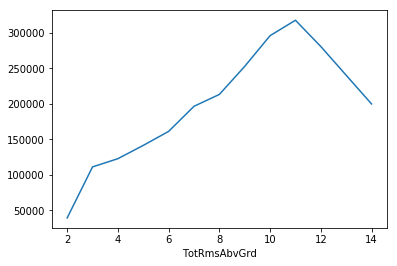

In [24]:
train.groupby('TotRmsAbvGrd')['SalePrice'].mean().plot()

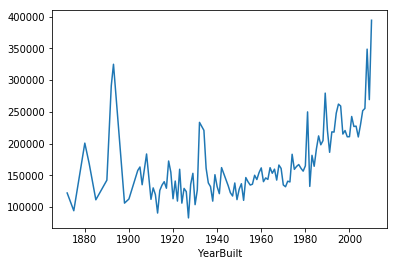

In [25]:
train.groupby(['YearBuilt'])['SalePrice'].mean().plot()
# train.groupby(['YearBuilt'])['SalePrice'].mean().plot()

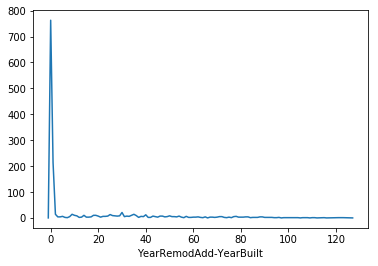

In [26]:
df['YearRemodAdd-YearBuilt'] = df['YearRemodAdd'].apply(np.int) - df['YearBuilt'].apply(np.int)
df.groupby('YearRemodAdd-YearBuilt')['SalePrice'].count().plot()

In [27]:
df['LotArea'] = df['LotArea'].apply(np.log1p)
# ss.distplot(df['LotArea'])

# fig = plt.figure()
# ax = fig.add_subplot(111)
# stats.probplot(df['LotArea'], plot=ax)

In [28]:
df['Overall'] = df['OverallCond'] * df['OverallQual']
df['NumOfBath'] = df['BsmtFullBath'] + df['BsmtHalfBath']*0.5 + df['FullBath'] + df['HalfBath']*0.5
df['PorchSF'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']
df['TotalSF'] = df['1stFlrSF'] + df['2ndFlrSF'] + df['TotalBsmtSF']

df = df.drop(['Utilities','Street','PoolQC'], axis=1)

In [29]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenP

In [30]:
df['HasPool'] = df['PoolArea'].apply(lambda x: 1 if x>0 else 0)
df['HasSecFlr'] = df['2ndFlrSF'].apply(lambda x: 1 if x>0 else 0)
df['HasGarage'] = df['GarageArea'].apply(lambda x: 1 if x>0 else 0)
df['HasBamt'] = df['TotalBsmtSF'].apply(lambda x: 1 if x>0 else 0)
# df['HasFirePlace'] = df['Fireplaces'].apply(lambda x: 1 if x>0 else 0)

In [31]:
df.corr().sort_values(by=['SalePrice'], ascending=False).SalePrice

SalePrice                 1.000000
OverallQual               0.795774
TotalSF                   0.764712
GrLivArea                 0.702933
TotalBsmtSF               0.651153
GarageCars                0.641047
NumOfBath                 0.635896
GarageArea                0.629217
1stFlrSF                  0.598540
Overall                   0.566759
FullBath                  0.562165
TotRmsAbvGrd              0.537769
MasVnrArea                0.480421
Fireplaces                0.469862
BsmtFinSF1                0.409384
LotArea                   0.392170
LotFrontage               0.352716
WoodDeckSF                0.324758
OpenPorchSF               0.321142
2ndFlrSF                  0.320532
HalfBath                  0.284590
HasGarage                 0.236883
BsmtFullBath              0.228459
BsmtUnfSF                 0.214460
PorchSF                   0.196875
BedroomAbvGr              0.168245
HasBamt                   0.152860
HasSecFlr                 0.137953
ScreenPorch         

## Modeling

In [32]:
from sklearn.grid_search import GridSearchCV 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LassoCV, Lasso
from sklearn.svm import SVR

import lightgbm as lgb
from xgboost import XGBRegressor

C:\Users\Voyager\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Voyager\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [33]:
df_copy = df.copy()
df_y = np.log1p(df_copy['SalePrice'])
df_copy.drop(['Id', 'SalePrice'], axis=1, inplace=True)
df_x = pd.get_dummies(df_copy)
x = df_x[:len(train)-2]
y = df_y[:len(train)-2]
test_x = df_x[len(train)-2:]

train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size=0.2, random_state=42)

## lightgbm

In [34]:
paramaters = {
    'max_depth':[4],
    'num_leaves':[3],
    'feature_fraction': [0.2],
    'cat_smooth': [1],
    'bagging_fraction':[0.9],
    'bagging_freq': [3],
    'cat_smooth':[0]
    
}

gbm = lgb.LGBMRegressor(
                    objective='regression',
                    learning_rate = 0.01,
                    n_estimators=5000,
                    verbose = -1
)

gscv = GridSearchCV(gbm,
                    param_grid=paramaters,
                    cv=5,
                    n_jobs=-1
                   )
gscv.fit(x, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.01, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=5000, n_jobs=-1, num_leaves=31, objective='regression',
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0,
       verbose=-1),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [4], 'num_leaves': [3], 'feature_fraction': [0.2], 'cat_smooth': [0], 'bagging_fraction': [0.9], 'bagging_freq': [3]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [35]:
gscv.best_params_

{'bagging_fraction': 0.9,
 'bagging_freq': 3,
 'cat_smooth': 0,
 'feature_fraction': 0.2,
 'max_depth': 4,
 'num_leaves': 3}

In [36]:
gscv.best_score_

0.9112199443806296

In [37]:
np.sqrt(np.sum(np.power((gscv.best_estimator_.predict(valid_x) - valid_y),2))/len(valid_y))

0.08705014158898404

## xgboost

In [38]:
params = {
    'max_depth': [3]
}
xgboost = XGBRegressor(learning_rate=0.01,
                       n_estimators=3460,
                       min_child_weight=0,
                       gamma = 0,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:squarederror',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)
gscv_xg = GridSearchCV(xgboost,
                       cv=5,
                       param_grid=params,
                       n_jobs=-1)
gscv_xg.fit(x, y)

C:\Users\Voyager\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Voyager\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


GridSearchCV(cv=5, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.7, gamma=0,
       importance_type='gain', learning_rate=0.01, max_delta_step=0,
       max_depth=3, min_child_weight=0, missing=None, n_estimators=3460,
       n_jobs=1, nthread=-1, objective='reg:squarederror', random_state=42,
       reg_alpha=6e-05, reg_lambda=1, scale_pos_weight=1, seed=27,
       silent=None, subsample=0.7, verbosity=1),
       fit_params={}, iid=True, n_jobs=-1, param_grid={'max_depth': [3]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [39]:
gscv_xg.best_score_

0.9182838939823688

In [40]:
np.sqrt(np.sum(np.power((gscv_xg.best_estimator_.predict(valid_x) - valid_y),2))/len(valid_y))

0.051259672596635816

## svr

In [41]:
params = {
    'epsilon' : [0.001],
    'gamma' : [0.0001]
}
svr = SVR(C=20)
gscv_svr = GridSearchCV(svr,
                        cv=5,
                       param_grid = params,
                       n_jobs = -1)
gscv_svr.fit(x, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=20, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'epsilon': [0.001], 'gamma': [0.0001]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [42]:
gscv_svr.best_score_

0.1262860091578182

In [43]:
gscv_svr.best_params_

{'epsilon': 0.001, 'gamma': 0.0001}

In [44]:
np.sqrt(np.sum(np.power((gscv_svr.best_estimator_.predict(valid_x) - valid_y),2))/len(valid_y))

0.0015414986235854351

## Lasso

In [46]:
params = {
    'alpha': [0.001] 
}
lasso = Lasso(max_iter=1e5,
             random_state=42)
gscv_lasso = GridSearchCV(lasso,
                          cv=3,
                         param_grid = params,
                         n_jobs = -1)
gscv_lasso.fit(x, y)

GridSearchCV(cv=3, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=100000.0,
   normalize=False, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'alpha': [0.0001, 0.0003, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [47]:
print('Best score: ', gscv_lasso.best_score_)
print('Best params: ', gscv_lasso.best_params_)

Best score:  0.9172391240976264
Best params:  {'alpha': 0.001}


In [48]:
np.sqrt(np.sum(np.power((gscv_lasso.best_estimator_.predict(valid_x) - valid_y),2))/len(valid_y))

0.10113173725356718

In [53]:
pred_lgb = gscv.best_estimator_.predict(test_x)
pred_xg = gscv_xg.best_estimator_.predict(test_x)
pred_svr = gscv.best_estimator_.predict(test_x)
pred_lasso = gscv.best_estimator_.predict(test_x)

In [57]:
pred = pred_lasso

submission = pd.DataFrame({'Id':test.Id, 'SalePrice':np.expm1(pred)})
submission.to_csv('submission_2020_02_19.csv', index=False)